# 1 Motivation

Bayesian inference provides a probabilistic approach for parameter estimation. The Bayesian neural network (BNN), or Bayesian deep learning (BDL), is a neural network with a probability distribution over weights rather than a fixed set of weights. This induces a distribution over outputs, capturing uncertainty in the predictions.  It has many theoretical and practical benefits: 

**a)** Bayesian methods provide an approach to quantify uncertainty[1]. In BNN, the epistemic uncertainty p(θ|D) and the aleatoric uncertainty p(y|x, θ) can be distinguished. This makes BNNs very data-efficient since they can learn from a small dataset without overfitting[2]. In prediction, out-of-training distribution points will have high epistemic uncertainty instead of blindly giving a wrong prediction.

**b)** BNNs can encode knowledge or subjective beliefs in priors. For example, in financial problems, Using heavy-tailed priors like Cauchy and LogUniform instead of the common Gaussian prior can improve the calibration and predictive performance[3]. Further, priors can be constructed hierarchically with first-level priors over weights and second-level hyper-priors over weight priors parameters. The hyper-priors are defined to express uncertainty about the hyperparameters themselves[4], which has been proved to have an improved learning ability when the training data is contaminated[5].

**c)** BNNs provide probabilistic interpretation for deep learning tools. For example, most regularization methods used for point estimate neural networks can be understood as a prior, with L1 regularization aligning with a Laplace prior and L2 regularization with a Gaussian prior. In addition, dropout has been shown to be equivalent to a variational posterior in uncertainty estimates[6].

**d)** BNNs can replace traditional Bayesian approaches like Gaussian processes (GPs) in time series forecasting[7]. First, training large GPs is computationally expensive, and traditional training algorithms scale as the cube of the number of data points in the time series. In contrast, for a fixed width, training a BNN will often be approximately linear in the number of data points. Second, BNNs lend themselves better to GPU and TPU hardware acceleration than GP training operations. Third, compositional BNNs can create "hybrid" architectures, which have the ability to learn the contributions from potentially high-dimensional covariate information.

**e)** BNNs even can be theoretically described under physical consideration. An intriguing interpretation with statistical mechanics have been derived[8].The partition function, as a sum over all possible quantum states of a system, can be considered a posterior distribution that integrates over all possible weights[9].

The workflow to design (a), train (b) and use a BNN for predictions (c) are displayed below [1]: 

<center>
  <img src="Figure/BNN_Workflow.png" alt="BNN_Workflow" width="1000"/>
</center>

# 2 Literature Review

## 2.1 Related Research
Time series forecasting is a long-standing core challenge in economics, statistics, and machine learning[3,10,11]. As most traditional neural networks (TNNs) BNNs, numerous model combinations have been employed in this field. Many of these studies rely on variational inference[12], using a surrogate model to approximate the posterior distribution. One representative work by H. J. Hortúa[3] combined convolutional neural network architectures, ResNet and AlexNet, with the natural variational inference technique VOGN, achieving great accuracy and uncertainty estimates in predicting the Volatility Index.

For MCMC implementations, F. Liang[11] found that in non-linear time series data, including sunspot numbers, BNNs outperformed traditional Box-Jenkins models, Self-Exciting Threshold Autoregressive Models (SETAR), bilinear models, and TNNs. He also suggested that model weights often become extremely large (in absolute value) to ensure sufficient learning from the training data in a parsimonious model. Furthermore, he emphasized that slight weight variation can be more crucial than a simple model structure.

## 2.2 Acknowledgement
The code implementation primarily draws on the work presented in [13], which was originally designed for the Bayesian Linear model and a Bayesian Neural Network (BNN) with a single hidden layer. Building upon this foundation, this work reconstructs both the Neural Network and the sampling to accommodate a multi-layer feedforward structure while placing greater focus on regression tasks.The Gelman–Rubin convergence diagnostic follows the implementation provided in `pt-Bayeslands` package[14].

# Reference
[1] L. V. Jospin, W. Buntine, F. Boussaid, H. Laga, and M. Bennamoun, “Hands-on Bayesian Neural Networks -- a Tutorial for Deep Learning Users,” *IEEE Comput. Intell. Mag.*, vol. 17, no. 2, pp. 29–48, May 2022, doi: [10.1109/MCI.2022.3155327](https://doi.org/10.1109/MCI.2022.3155327).  
[2] S. Depeweg, J. M. Hernández-Lobato, F. Doshi-Velez, and S. Udluft, “Decomposition of Uncertainty in Bayesian Deep Learning for Efficient and Risk-sensitive Learning.” arXiv, Jun. 15, 2018. doi: 10.48550/arXiv.1710.07283.
[3] H. J. Hortúa and A. Mora-Valencia, “Forecasting VIX using Bayesian Deep Learning.” arXiv, Jan. 30, 2024. Accessed: May 08, 2024. [Online]. Available: http://arxiv.org/abs/2401.17042  
[4] J. Arbel, K. Pitas, M. Vladimirova, and V. Fortuin, “A Primer on Bayesian Neural Networks: Review and Debates.” arXiv, Sep. 28, 2023. Accessed: May 08, 2024. [Online]. Available: http://arxiv.org/abs/2309.16314  
[5] X. Luo and A. Kareem, “Bayesian deep learning with hierarchical prior: Predictions from limited and noisy data,” Structural Safety, vol. 84, p. 101918, May 2020, doi: 10.1016/j.strusafe.2019.101918.  
[6] Y. Gal and Z. Ghahramani, “Dropout as a Bayesian Approximation: Representing Model Uncertainty in Deep Learning.” arXiv, Oct. 04, 2016. doi: 10.48550/arXiv.1506.02142.  
[7] Urs Köster, “AutoBNN: Probabilistic time series forecasting with compositional bayesian neural networks.” Github, March 28, 2024. [Online]. Available: https://github.com/tensorflow/probability/tree/main/spinoffs/autobnn  
[8] R. Pacelli, S. Ariosto, M. Pastore, F. Ginelli, M. Gherardi, and P. Rotondo, “A statistical mechanics framework for Bayesian deep neural networks beyond the infinite-width limit,” *Nat Mach Intell*, vol. 5, no. 12, pp.   1497–1507, Dec. 2023, doi: [10.1038/s42256-023-00767-6](https://doi.org/10.1038/s42256-023-00767-6).    
[9] P. Izmailov, S. Vikram, M. D. Hoffman, and A. G. Wilson, “What Are Bayesian Neural Network Posteriors Really Like?” arXiv, Apr. 29, 2021. Accessed: Apr. 08, 2024. [Online]. Available: http://arxiv.org/abs/2104.14421.   
[10] L. Zhu and N. Laptev, “Deep and Confident Prediction for Time Series at Uber,” in 2017 IEEE International Conference on Data Mining Workshops (ICDMW), Nov. 2017, pp. 103–110. doi: 10.1109/ICDMW.2017.19.   
[11] F. Liang, “Bayesian neural networks for nonlinear time series forecasting,” Stat Comput, vol. 15, no. 1, pp. 13–29, Jan. 2005, doi: 10.1007/s11222-005-4786-8.  
[12] B. Mostafa, R. Hassan, H. Mohammed, and M. Tawfik, “A Review of Variational Inference for Bayesian Neural Network,” in Artificial Intelligence and Industrial Applications, T. Masrour, H. Ramchoun, T. Hajji, and M. Hosni, Eds., Cham: Springer Nature Switzerland, 2023, pp. 231–243. doi: 10.1007/978-3-031-43520-1_20.  
[13] R. Chandra, R. Chen, and J. Simmons, “Bayesian neural networks via MCMC: a Python-based tutorial.” arXiv, Apr. 02, 2024. Accessed: Apr. 08, 2024. [Online]. Available: http://arxiv.org/abs/2304.02595.    
[15] T. Salles, N. Flament, and D. Müller, “Influence of mantle flow on the drainage of eastern Australia since the Jurassic Period,” Geochemistry, Geophysics, Geosystems, vol. 18, no. 1, pp. 280–305, 2017, doi: 10.1002/2016GC006617.

# 3 Dataset

**Background:** Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle.

**Sunspot dataset** (https://www.swpc.noaa.gov/products/solar-cycle-progression): contains monthly mean total sunspot numbers since 1818. After normalization, the univariate time series are transfromed into a state-space vector through Taken's theorem, which is governed by the embedding dimension (D) and time-lag (T). This is also known as **data windowing**. In this work, D = 4 and T = 2 are used for data reconstruction.

The **noise** is assumed to be Gaussian with variance $\tau^2$, and $\mathbf{x}_t=$ $\left(y_{t-1}, \ldots, y_{t-D}\right)$ is a vector of lagged values of $y_t$, so that
$$
y_t=f(\mathbf{x}_t,\mathbf{\theta})+\epsilon_t, \text { for } t=1,2, \ldots, n  \quad \epsilon_t \sim \mathcal{N}\left(0, \tau^2\right) \forall t
$$  

<center>
  <img src="Figure/Data_Windowing.png" alt="Data_Windowing" width="500"/>
</center>

In [1]:
import numpy as np
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# D = 4
# T = 2

# def read_data(file_path):
#     """Read data from file."""
#     with open(file_path, 'r') as file:
#         return [float(line.strip()) for line in file.read().strip().split('\n')]

# def save_data(file_path, windows):
#     """Save data to file."""
#     with open(file_path, 'w') as file:
#         for x, y in windows:
#             formatted_values = ','.join(f'{value:.4f}' for value in x)
#             file.write(f'{formatted_values},{y:.4f}\n')

# def windowing(data, window_size=D+1):
#     """Create data windows."""
#     return [(data[i:i + 4], data[i + 4]) for i in range(len(data) - window_size)]

# data = read_data('sunspot.dat')

# pipeline = Pipeline([
#     ('standardize', StandardScaler()),
#     ('normalize', MinMaxScaler(feature_range=(0, 1)))
# ])

# preprocessed_data = pipeline.fit_transform(np.array(data).reshape(-1, 1)).flatten()
# preprocessed_data[preprocessed_data == 0] = 1e-3

# windows = windowing(preprocessed_data)
# windowsT = [window for index, window in enumerate(windows) if (index+T-1) % T == 0]

# split_index = int(0.66 * len(windowsT))
# train = windowsT[:split_index]
# test = windowsT[split_index:]

# 4 Model and Training

## 4.1 Neural Network

**In this notebook, we use BNN with 3 hidden layers (10, 5, 3) as an example.**

### 4.1.1 Xaiver Initialization
Proper initialization can help in stable propagation, faster convergence and avoiding the vanishing or exploding gradients problem. **Xavier initialization**[1] is an effective technique to maintain variance in the forward and backward passes, specifically when using certain activation functions like the hyperbolic tangent (tanh) and the logistic sigmoid. In `xavier_init` function, the initial weights and biases are drawn from a gaussian distribution with a mean of 0 and a specific standard deviation, determined by the number of neurons in this layer $d_i$ or the next layer $d_{i+1}$.
   $$ 
   W_i \sim \mathcal{N}\left(0, \frac{1}{\sqrt{d_i}}\right) \quad b_i \sim \mathcal{N}\left(0, \frac{1}{\sqrt{d_{i+1}}}\right)
   $$

### 4.1.2 Forward Pass
In this work, a simple architecture of feedforward networks is implemented. Each layer **l** is represented as a linear transformation, followed by a nonlinear operation **s**, known as an activation function:

$$
\begin{aligned} \boldsymbol{l}_0 & =\boldsymbol{x} \\ \boldsymbol{l}_i & =s_i\left(\boldsymbol{W}_i \boldsymbol{l}_{i-1}+\boldsymbol{b}_i\right) \quad \forall i \in[1, n] \\ \boldsymbol{y} & =\boldsymbol{l}_n .\end{aligned}
$$

This process is realized in `forward` function with `sigmoid` activation function.

### 4.1.3 Backward Pass
Gradient-based Langevin dynamics is applied to update the model parameters using in `backward_pass` function.

$$
\begin{aligned}
& \bar{\theta}_p=\theta_p+r \times \nabla E_{y_{\mathcal{A}_{D, T}}}\left[\theta_p\right] \\
& \nabla E_{y_{\mathcal{A}_{D, T}}}\left[\theta_p\right]=\left(\frac{\delta E}{\delta \theta_1}, \ldots, \frac{\delta E}{\delta \theta_L}\right) \\
& E_{y_{\mathcal{A}_{D, T}}}\left[\theta_p\right]=\sum_{t \in \mathcal{A}_{D, T}}\left(y_t-f\left(x_t\right)^{[k]}\right)^2
\end{aligned}
$$
where $\theta=\left(w_h, w_o, \delta_h, \delta_o\right)$ comprises the weights and biases of the NN model.
    
The $\bar{\theta_p}$ here will serve as proposals in the subsequent MCMC sampling instead of being directly used as new network parameters.

The `encode` and `decode` transform the neural network parameters to and from a flat array format, so that these parameters are optimized in `langevin_gradient` over multiple iterations.

In [2]:
import pandas as pd
from tqdm import tqdm
np.random.seed(seed=6666)

weights = []
biases = []
outputs = []

def xavier_init():
    for i in range(num_layers):
        weight_matrix = np.random.normal(
            loc=0, scale=1/np.sqrt(layer_sizes[i]),
            size=(layer_sizes[i], layer_sizes[i+1]))
        bias_vector = np.random.normal(
            loc=0, scale=1/np.sqrt(layer_sizes[i+1]), 
            size=(layer_sizes[i+1],))

        weights.append(weight_matrix)
        biases.append(bias_vector)
        outputs.append(np.zeros((1, layer_sizes[i+1])))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(X):
    current_input = X
    for i in range(num_layers):
        z = np.dot(current_input, weights[i]) + biases[i]
        current_input = sigmoid(z)
        outputs[i] = current_input
    return current_input

def backward(X, Y):
    Y_transformed = Y
    deltas = [None] * num_layers

    deltas[-1] = (Y_transformed - outputs[-1]) * (outputs[-1] * (1 - outputs[-1]))

    for i in range(num_layers - 2, -1, -1):
        deltas[i] = np.dot(deltas[i + 1], weights[i + 1].T) * (outputs[i] * (1 - outputs[i]))

    inputs = [X] + outputs[:-1]

    for i in range(num_layers):
        weight_delta = np.outer(inputs[i], deltas[i])

        weights[i] += lrate * weight_delta
        biases[i] += lrate * deltas[i]

def encode():
    flat_weights_biases = []
    for w, b in zip(weights, biases):
        flat_weights_biases.extend(w.ravel())
        flat_weights_biases.extend(b)
    return np.array(flat_weights_biases)


def decode(theta):
    current_index = 0
    for i in range(num_layers):
        input_size, output_size = layer_sizes[i], layer_sizes[i+1]
        weight_size = input_size * output_size

        weights[i] = np.reshape(
            theta[current_index:current_index + weight_size],
            (input_size, output_size)
        )
        current_index += weight_size

        biases[i] = theta[current_index:current_index + output_size]
        current_index += output_size

def langevin_gradient(x_data, y_data, theta, depth):
    decode(theta)
    size = x_data.shape[0]

    for _ in range(depth):
        for ii in range(size):
            forward(x_data[ii,])
            backward(x_data[ii,], y_data[ii])

    theta_updated = encode()
    return theta_updated

def rmse(predictions, targets):
    
    return np.sqrt(((predictions - targets) ** 2).mean())

def R2(predictions, targets):

    ssr = np.sum((predictions - targets)**2)
    sst = np.sum((targets - np.mean(targets))**2)
    return 1 - (ssr / sst)


## 4.2 Prior and likelihood
### 4.2.1 Prior
To realize a **Conjugate prior** , We  assume a multivariate Gaussian prior for $\theta$  and an **inverse Gamma** distribution (IG) for $\tau^2$ in `prior_function`.
$$
\theta \sim \mathcal{N}\left(0, \sigma^2\right) \quad \tau^2  \sim I G\left(\nu_1, \nu_2\right)
$$

That is:
$$
p(\boldsymbol{\theta}) \propto  \frac{1}{\left(2 \pi \sigma^2\right)^{L / 2}} \times \exp \left\{-\frac{1}{2 \sigma^2}\left(\sum_{h=1}^H \sum_{d=1}^D w_{d h}^2+\sum_{k=1}^K \sum_{h=1}^H\left(\delta_{h k}^2+v_{h k}^2\right)+\delta_o^2\right)\right\} 
\times \tau^{2\left(1+v_1\right)} \exp \left(\frac{-\nu_2}{\tau^2}\right)
$$


### 4.2.2 likelihood
The Bayesian approach for the time series problem requires sampling (estimating) the posterior distribution $p(\theta \mid \mathbf{y})$ that requires the definition of both a likelihood function $p(\theta \mid \mathbf{x})$ and prior distribution $p(\theta)$. In `likelihood_function`, We define the likelihood function (Logarithm form in code practice), i.e probability of the data given the model, which is given by the product of the likelihood for every data point in the dataset of $S$ instances:

$$
p\left(\mathbf{y} \mid \mathbf{x}, \theta, \tau^2\right)=\prod_{t=1}^S p\left(\mathbf{y}_t \mid \mathbf{x}_t, \theta, \tau^2\right)
$$

That is: 

$$
p\left(\mathbf{y} \mid \boldsymbol{\theta}\right)= -\frac{1}{\left(2 \pi \tau^2\right)^{n / 2}} \times \exp \left(-\frac{1}{2 \tau^2} \sum_t \left(y_t-f\left(\mathbf{x}_t,\mathbf{\theta}\right)\right)^2\right)
$$

and equivalently,

$$
\mathbf{y}=f(\mathbf{x}, \theta)+e \quad e \sim \mathcal{N}\left(0, \tau^2\right)
$$

which is more evident to express the Gaussian noise consideration.

Notably, θ is a set of distributions in BNN models rather than a fixed point estimate in conventional linear models.

In [3]:
def evaluate_proposal(x_data, theta):
    size = x_data.shape[0]

    fx = np.zeros(size)
    prob = np.zeros((size, layer_sizes[-1]))

    for i in range(size):
        fx_tmp = forward(x_data[i,])
        fx[i] = fx_tmp.item()

    return fx, prob

def prior_likelihood(sigma_squared, nu_1, nu_2, theta, tausq): 

    n_params = theta_size 
    part1 = -1 * (n_params / 2) * np.log(sigma_squared)
    part2 = 1 / (2 * sigma_squared) * (sum(np.square(theta)))
    log_prior = part1 - part2 - (1 + nu_1) * np.log(tausq) - (nu_2 / tausq)
    return log_prior

def likelihood_function(theta, tausq, test=False):

    if test:
        x_data = x_test
        y_data = y_test
    else:
        x_data = x_train
        y_data = y_train

    model_prediction, _ = evaluate_proposal(x_data, theta)
    model_simulation = model_prediction + np.random.normal(0,tausq,size=model_prediction.shape) 
    accuracy = rmse(model_prediction, y_data) 
    
    log_likelihood = np.sum(-0.5 * np.log(2 * np.pi * tausq) - 0.5 * np.square(y_data - model_prediction) / tausq)
    return [log_likelihood, model_prediction, model_simulation, accuracy] 

## 4.3 MCMC Sampling

In a Metropolis-Hastings step, the proposal $θ^p$ for a position s is accepted with the probability α:

$$
\alpha=\min \left(1, \frac{p\left(\theta^p \mid y\right) q\left(\theta^{[s]} \mid \theta^p\right)}{p\left(\theta^{[s} \mid y\right) q\left(\theta^p \mid \theta^{[s]}\right)}\right)
$$

Substitute $p(\theta \mid y)$ into with $p(\theta \mid y) \propto p(\theta) \cdot p(y \mid \theta)$ :

$$
\alpha=\min \left(1, \frac{p\left(\theta^p\right) \cdot p\left(y \mid \theta^p\right) \cdot q\left(\theta^{[s]} \mid \theta^p\right)}{p\left(\theta^{[s]}\right) \cdot p\left(y \mid \theta^{[s]}\right) \cdot q\left(\theta^p \mid \theta^{[s]}\right)}\right)
$$

Simplifying further, we get:
$$
\log \alpha=\min \left(0, \log \left(\frac{p\left(\theta^p\right)}{p\left(\theta^{[s]}\right)}\right)+\log \left(\frac{p\left(y \mid \theta^p\right)}{p\left(y \mid \theta^{[s]}\right)}\right)+\log \left(\frac{q\left(\theta^{[s]} \mid \theta^p\right)}{q\left(\theta^p \mid \theta^{[s]}\right)}\right)\right)
$$

The last equation is exactly how it's implemented in the  `sampler` function: `mh_prob = min(1, np.exp(diff_likelihood + diff_priorlikelihood + diff_prop))`

To balance the computational effciency and accuracy, a combination of random-walk proposal distribution with Langevin-gradients is applied. The Pseudocode for the MCMC implmentation is provided below:

---
**Algorithm:** BNN via Langevin MCMC sampling  
**Input:** Sunspot Dataset  
**Output:** Posterior distribution of model parameters (weights and biases)  

1.1 Draw initial values $θ_0$ from the prior  
**for each** s **until** S_max **do**  
&nbsp;&nbsp;1.2 **Use** Langevin-gradient proposal distribution:  
&nbsp;&nbsp;&nbsp;&nbsp; $θ^p ∼ 𝒩(θ^{[s]}, Σ_θ)$  
&nbsp;&nbsp;1.3 **Evaluate** prior and log-likelihood  
&nbsp;&nbsp;1.4 **Compute** the acceptance ratio α  
&nbsp;&nbsp;1.5 **Draw** u from a Uniform-distribution [0,1]  
&nbsp;&nbsp;&nbsp;&nbsp;**if** u ≤ α **then**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Accept** replica state: $θ^{[s+1]} ← θ^p$  
&nbsp;&nbsp;&nbsp;&nbsp;**end**  
&nbsp;&nbsp;&nbsp;&nbsp;**else**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Reject** and retain previous state: $θ^{[s+1]} ← θ^{[s]}$  
&nbsp;&nbsp;&nbsp;&nbsp;**end**  
**end**  

---

In [4]:
def sampler():

    step_theta = 0.025;  
    step_eta = 0.2; 
    sgd_depth = 1
    n_burnin = burn_in

    pos_theta = np.ones((n_samples, theta_size)) 
    pos_tau = np.ones((n_samples, 1))
    pos_eta = np.ones((n_samples, 1))
    pred_y = np.zeros((n_samples, x_train.shape[0]))
    sim_y = np.zeros((n_samples, x_train.shape[0]))

    rmse_data = np.zeros(n_samples)
   
    test_pred_y = np.ones((n_samples, x_test.shape[0]))
    test_sim_y = np.ones((n_samples, x_test.shape[0]))
    test_rmse_data = np.zeros(n_samples)

    theta = np.random.randn(theta_size)
    pred_y[0,], _ = evaluate_proposal(x_train, theta)

    eta = np.log(np.var(pred_y[0,] - y_train))
    tau_proposal = np.exp(eta)

    prior = prior_likelihood(sigma_squared, nu_1, nu_2, theta, tau_proposal)

    [likelihood, pred_y[0,], sim_y[0,], rmse_data[0]] = likelihood_function(theta, tau_proposal)

    n_accept = 0  
    n_langevin = 0

    for ii in tqdm(np.arange(1,n_samples),miniters=np.int64(n_samples/20)):

        theta_gd = langevin_gradient(x_train, y_train, theta.copy(), sgd_depth)  
        theta_proposal = np.random.normal(theta_gd, step_theta, theta_size)
        theta_proposal_gd = langevin_gradient(x_train, y_train, theta_proposal.copy(), sgd_depth) 

        wc_delta = (theta - theta_proposal_gd) 
        wp_delta = (theta_proposal - theta_gd)

        sigma_sq = step_theta

        first = -0.5 * np.sum(wc_delta * wc_delta) / sigma_sq  # this is wc_delta.T  *  wc_delta /sigma_sq
        second = -0.5 * np.sum(wp_delta * wp_delta) / sigma_sq

        diff_prop =  first - second
        n_langevin += 1


        eta_proposal = eta + np.random.normal(0, step_eta, 1)
        tau_proposal = np.exp(eta_proposal)   

        prior_proposal = prior_likelihood(
            sigma_squared, nu_1, nu_2, theta_proposal, tau_proposal
        ) 

        [likelihood_proposal, pred_y[ii,], sim_y[ii,], rmse_data[ii]] = likelihood_function(
            theta_proposal, tau_proposal
        )

        [_, test_pred_y[ii,], test_sim_y[ii,], test_rmse_data[ii]] = likelihood_function(
            theta_proposal, tau_proposal, test=True
        )

        diff_likelihood = likelihood_proposal - likelihood
        diff_priorlikelihood = prior_proposal - prior
        
        mh_prob = min(1, np.exp(diff_likelihood + diff_priorlikelihood + diff_prop))

        u = np.random.uniform(0, 1)

        if u < mh_prob:
            n_accept += 1
            likelihood = likelihood_proposal
            prior = prior_proposal
            theta = theta_proposal
            eta = eta_proposal
            # and store
            pos_theta[ii,] = theta_proposal
            pos_tau[ii,] = tau_proposal
            pos_eta[ii,] = eta_proposal
        else:
            # store
            pos_theta[ii,] = pos_theta[ii-1,]
            pos_tau[ii,] = pos_tau[ii-1,]
            pos_eta[ii,] = pos_eta[ii-1,]

    accept_ratio = (n_accept / n_samples) * 100
    print('{:.3}% was accepted'.format(accept_ratio))

    pos_theta = pos_theta[n_burnin:, ]
    pos_tau = pos_tau[n_burnin:, ]
    pos_eta = pos_eta[n_burnin:, ]
    index = 0
    results_dict = {}

    weight_counter = 0  
    bias_counter = 0   
    current_index = 0

    for i in range(num_layers):
        input_size, output_size = layer_sizes[i], layer_sizes[i+1]
        weight_size = input_size * output_size
        bias_size = output_size


        for j in range(weight_size):
            results_dict['w{}'.format(weight_counter)] = pos_theta[:,current_index].squeeze()
            current_index += 1
            weight_counter += 1

        for k in range(bias_size):
            results_dict['b{}'.format(bias_counter)] = pos_theta[:,current_index].squeeze()
            current_index += 1
            bias_counter += 1
    results_dict['tau'] = pos_tau.squeeze()
    results_dict['eta'] = pos_eta.squeeze()

    pred_dict = {}
    pred_dict['train_pred'] = pred_y[n_burnin:,:]
    pred_dict['train_sim'] = sim_y[n_burnin:,:]
    pred_dict['test_pred'] = test_pred_y[n_burnin:,:]
    pred_dict['test_sim'] = test_sim_y[n_burnin:,:]
    
    results_df = pd.DataFrame.from_dict(results_dict)

    return results_df, pred_dict

In [5]:
train_data   = np.loadtxt("train.txt")
test_data    = np.loadtxt("test.txt")
x_train = train_data[:,:-1]
y_train = train_data[:,-1]
x_test = test_data[:,:-1]
y_test = test_data[:,-1]

n_samples       = 3500
burn_in         = int(n_samples* 0.4) 
lrate           = 0.01
sigma_squared   = 25
nu_1            = 0
nu_2            = 0
layer_sizes     = [x_train.shape[1], 10, 5, 3, 1]
num_layers      = len(layer_sizes) - 1
n_params        = sum((layer_sizes[i] + 1) * layer_sizes[i + 1] for i in range(num_layers))
theta_size      = n_params 

xavier_init()
results, pred = sampler()

100%|██████████████████████████████████████████████████████████████████████████████| 3499/3499 [06:56<00:00,  8.40it/s]

22.1% was accepted


# 5 Validation

## 5.1 Regression Performance

### 5.1.1 RMSE and $R^2$
`sim_y` = `pred_y` + Gaussian noise ($\tau^2$)

In [6]:
pred_y = pred['train_pred']
sim_y = pred['train_sim']
pred_y_test = pred['test_pred']
sim_y_test = pred['test_sim']

train_RMSE = rmse(sim_y, y_train)
test_RMSE = rmse(sim_y_test, y_test)
print('Train RMSE: {:.5f}'.format(train_RMSE))
print('Test RMSE: {:.5f}'.format(test_RMSE))

train_R2 = R2(sim_y[:,1:].mean(axis=0)-y_train[:-1], np.diff(y_train))
test_R2 = R2(sim_y_test[:,1:].mean(axis=0)-y_test[:-1], np.diff(y_test))
print('Train R2 (dy): {:.5f}'.format(train_R2))
print('Test R2 (dy): {:.5f}'.format(test_R2))

Train RMSE: 0.02200
Test RMSE: 0.02022
Train R2 (dy): 0.63701
Test R2 (dy): 0.29024


## 5.1.2 Predictions with confidence interval

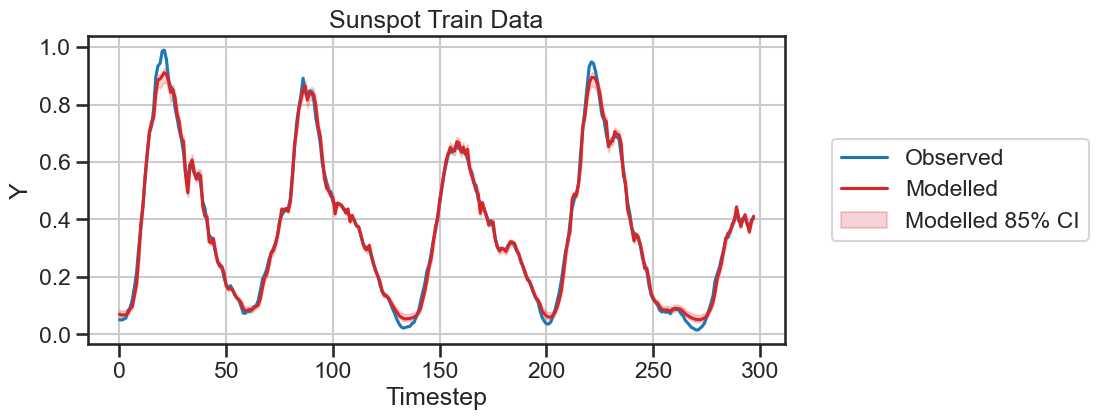

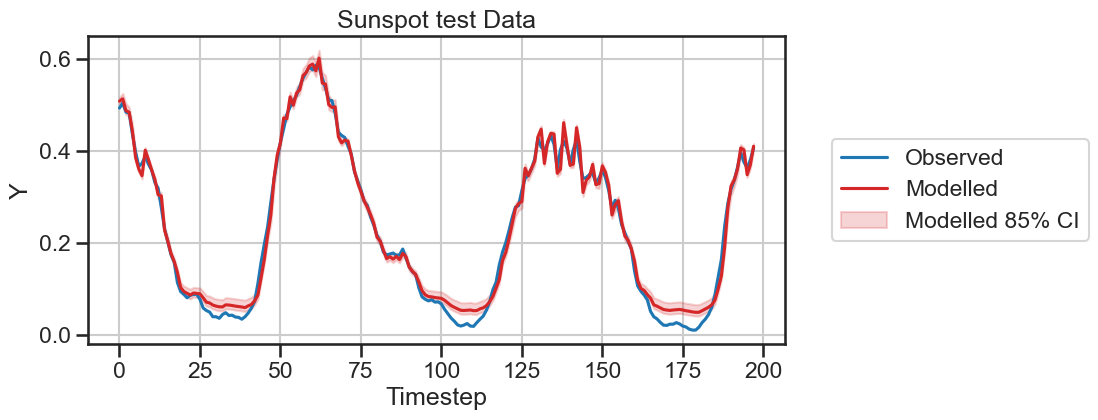

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_y_predictions(y_obs,y_mod,type='Train'):
    sns.set_context("talk")
    sns.set_style("ticks",{'axes.grid': True})

    fig = plt.figure(figsize=(9,4))
    ax1 = fig.add_subplot(111)

    x = np.arange(y_obs.shape[0])

    sns.lineplot(x=x,y=y_obs.squeeze(), ax=ax1, label='Observed')
    sns.lineplot(x=x,y=np.mean(y_mod,axis=0), ax=ax1,color='C3', label='Modelled')
    
    ax1.fill_between(x, np.percentile(y_mod,7.5,axis=0), np.percentile(y_mod,92.5,axis=0), color='C3',alpha=0.2, label='Modelled 85% CI')

    ax1.set_title('Sunspot {} Data'.format(type))
    ax1.set_xlabel('Timestep')
    ax1.set_ylabel('Y')
    lgd = plt.legend(loc='center left',bbox_to_anchor=(1.05,0.5))
    

plot_y_predictions(y_train, sim_y)
plot_y_predictions(y_test, sim_y_test, 'test')

Sampling n =10,000

<img src="Figure/Prediction_10k.png" alt="Prediction_10k" width="1000"/>

### 5.1.3 Y-Modelling

A scatter-plot of the observed (Y observed) and predicted values (Y modelled). This gives an indication of model’s ability to predict change at each timestep with a skill better than persistence (as observed Yt−1 is given as an input to the model, a model predicting yt = Yt−1 could have a low RMSE).

Text(0.5, 1.0, 'Test Data')

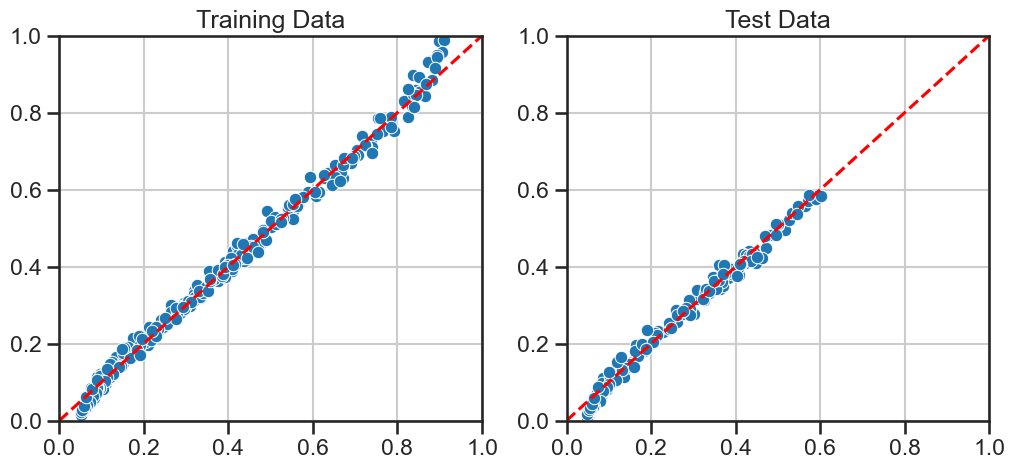

In [8]:
def plot_ycorr_scatter(ax, y_obs, y_mod, minmax=(0,1), dy=False):
    sns.set_context("talk")
    sns.set_style("ticks", {'axes.grid': True})

    ax.set_xlim(minmax[0], minmax[1])
    ax.set_ylim(minmax[0], minmax[1])
    ax.plot(ax.get_xlim(), ax.get_ylim(), '--r')

    sns.scatterplot(x=np.mean(y_mod, axis=0).squeeze(), y=y_obs.squeeze(), ax=ax)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  
plot_ycorr_scatter(ax1, y_train, pred_y, minmax=(0, 1))
plot_ycorr_scatter(ax2, y_test, pred_y_test, minmax=(0, 1))
ax1.set_title('Training Data')
ax2.set_title('Test Data')

Sampling n =10,000

<img src="Figure/Y_10k.png" alt="Y_10k" width="1000"/>

## 5.2 MCMC Convergence Diagnose

## 5.2.1 Acceptance rate

A roughly 23% rate implies that the posterior has been effectively sampled. 22.3% was accepted in this condition.

## 5.2.2 Gelman-Rubin diagnostic

The GelmanRubin (GR) convergence diagnostic is developed by sampling from multiple MCMC chains, whereby the variance of each chain is assessed independently (within-chain variance) and then compared to the variance between the multiple chains (between-chain variance) for each parameter. A large difference between these two variances would indicate that the chains have not converged on the same stationary distribution.  


Gelman-Rubin method needs to run m ≥ 2 independent Markov chains in parallel and compute GR statistic $\hat{R} \approx \sqrt{1+\frac{m}{\mathrm{ESS}}}$, where m is the number of chains. When $\hat{R} $ equals to 1, the sampleing is considered convergent. Here, five chains are evaluated, each with 10,000 samples of weights (excluding 40% burn-in samples) and computing the $\hat{R}$ values for each parameter.

In [9]:
# import xarray as xr
# from collections import ChainMap
# n_posterior_samples = results.shape[0]
# mcmc_run = xr.Dataset(
#     data_vars=ChainMap(*[{
#         _: (('chain','samples'), results.loc[:,_].values.reshape((1,n_posterior_samples))) for _ in results.columns
#     }, {
#         _: (('samples','train_idx',), pred[_]) for _ in pred if 'train' in _
#     }, {
#         _: (('samples','test_idx',), pred[_]) for _ in pred if 'test' in _
#     }]),
#     coords={
#         'chain': np.array([0]),
#         'samples': np.arange(n_posterior_samples),
#         'train_idx': np.arange(x_train.shape[0]),
#         'test_idx': np.arange(x_test.shape[0])
#     }
# )
# # mcmc_run.to_netcdf('6666-10k.nc')

In [10]:
# import glob
# from convergence import gelman_rubin

# results_files = glob.glob('*.nc')

# tmp_data = xr.open_mfdataset(results_files, combine='nested', concat_dim='chain')
# tmp_data.coords['chain'] = np.arange(len(results_files))
# results5 = tmp_data

# model_r_hat = []
# r_hat_collect = []
# data_collect = []

# train_dim = results5.coords['train_idx'].shape[0]
# test_dim = results5.coords['test_idx'].shape[0]
# train_pred = results5.train_pred.values.reshape((-1,train_dim))
# test_pred = results5.test_pred.values.reshape((-1,test_dim))

# params = results5.drop_vars(['train_pred', 'test_pred', 'train_sim', 'test_sim']).copy()
# params = params.drop_vars(['train_idx', 'test_idx'])
# params = params.to_stacked_array(new_dim='param', sample_dims=['chain', 'samples'])

# gr = np.log(gelman_rubin(params.values))
# param_names = np.array([_[0] for _ in params.param.values])
# good_params = param_names != 'tau'
# param_names = param_names[good_params]
# gr = gr[good_params]

# results5 = results5.assign_coords(param=param_names)
# results5 = results5.assign(rhat=(['param'], gr))

# r_hat_collect.append(gr)
# data_collect.extend(gr.shape[0] * ['Sunspot'])

# r_hat_collect = pd.DataFrame(
#     np.concatenate(r_hat_collect, axis=0),
#     columns=['rhat']
# )

# model_r_hat = pd.concat([r_hat_collect])

# sns.set_context('talk')
# fig, ax = plt.subplots(1,1,figsize=(8,6))
# sns.boxplot(data = model_r_hat,ax=ax)
# ax.set_ylabel('$\hat{R} values$', labelpad=10)

no enough space to store data of 5 chains


<center>
  <img src="Figure/GR_10k.png" alt="GR_10k" width="700"/>
</center>

# White-boxing

A notable advantage of BNNs is that we can observe each parameter's posterior distribution to understand what has been learned from the data.

<center>
  <img src="Figure/Point_Distribution.png" alt="Point_Distribution" width="700"/>
</center>

In [11]:
from ipywidgets import interact, fixed, widgets

def histogram_trace(pos_points, **kwargs):
  
    size = 15
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(10, 4))

    ax1 = fig.add_subplot(111)
    ax1.hist(pos_points,  bins = 20, color='C0', alpha=0.7, label='Sampled posterior')
    x_lims = ax1.get_xlim()

    ax1.set_xlim(x_lims)
    ax1.set_ylabel('Frequency', fontsize = size, labelpad=10)
    ax1.set_xlabel(kwargs.get('param_name','Parameter value'), fontsize = size, labelpad=10)
    ax1.set_title(kwargs.get('title','Posterior'), fontsize = size, pad=10)
    lgd=plt.legend(bbox_to_anchor=(1.25,0.5),loc='center left')
    fig.tight_layout()


    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(111)
    ax1.plot(pos_points,label='Posterior trace')   
    lgd = plt.legend(loc='center left',bbox_to_anchor=(1.025,0.5))
    plt.title("Parameter trace plot", fontsize = size, pad=10)
    plt.xlabel(' Number of Samples  ', fontsize = size, labelpad=10)
    plt.ylabel(' Parameter value ', fontsize = size, labelpad=10)
    plt.tight_layout()

def plot_hist(results, param_name):
    posterior_mean = results[param_name].mean()
    histogram_trace(results[param_name].values)

interact(
    plot_hist, 
    results=fixed(results), 
    param_name=widgets.Dropdown(
        options=results.columns,
        value='w0',
        description='Parameter:',
    )
)

interactive(children=(Dropdown(description='Parameter:', options=('w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w…

<function __main__.plot_hist(results, param_name)>

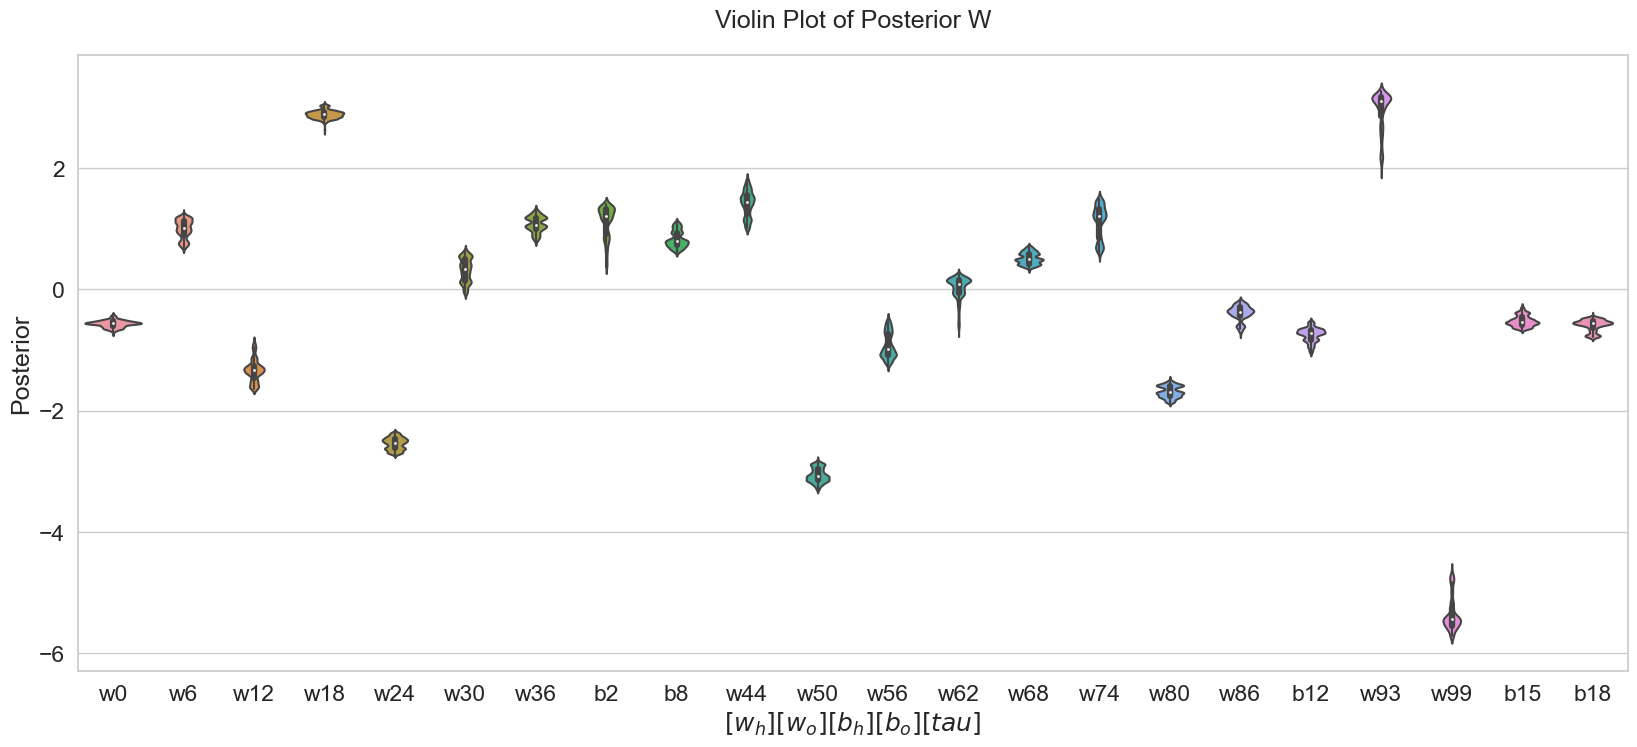

In [12]:
def violinplot_weights(results, width=20, skip=6):

    fig = plt.figure(figsize=(width, width * 0.4))
    ax1 = fig.add_subplot(111)

    df = pd.melt(results.drop(columns=['rmse'], errors='ignore'))
    
    filtered_variables = df['variable'].unique()[::skip]
    filtered_df = df[df['variable'].isin(filtered_variables)]
    
    sns.violinplot(data=filtered_df, x='variable', y='value', ax=ax1)
    
    ax1.set_ylabel('Posterior')
    ax1.set_title("Violin Plot of Posterior W", pad=20)
    ax1.set_xlabel('$[w_h][w_o][b_h][b_o][tau]$')
    plt.show()

violinplot_weights(results,width=20)

# 7 Physical/ML insights

## Exploring MCMC Convergence and Prediction Accuracy

In experiments involving 6,000, 10,000, 50,000, and 150,000 samples on superconductors, Here are several observations:

**Acceptance Rate:** As the sample size increased, the acceptance rate decreased, reaching approximately 2% at 150,000 samples.  
**Gelman-Rubin $\hat{R}$ Value:** The Gelman-Rubin $\hat{R}$ value gradually approached 1, indicating convergence at 150,000 samples.  
**R-squared ($R^2$) Score:** The coefficient of determination ($R^2$) significantly improved, particularly on the test set, increasing from 0.46 to 0.89.  


Despite less-than-ideal convergence metrics, the model exhibited commendable accuracy and satisfactory RMSE across all sample sizes, even as low as 6,000, when compared to the Bayesian linear model in [13]. This performance can be attributed to several factors:

**Periodic Dataset:** The sunspot data is highly periodic, with an approximate 11-year cycle.  
**Ineffective Convergence Indicators:** The chosen MCMC convergence metrics might not effectively reflect model performance. The 23 % acceptance rate standard is typically based on statistical and linear models, which may not apply to BNNs. Therefore, more research needs to be done to determine a good acceptance rate that aligns with convergence and ergodicity. The Gelman-Rubin diagnostics does not necessarily imply a poor performance in prediction tasks.  
**Superior Performance of BNNs:** The strong learning ability of Bayesian Neural Networks contributes to their excellent performance.  

<center>
  <img src="Figure/GR.png" alt="GR" "/>
</center>